# **Exploratory Data Analysis on Student Lifestyle and Academic Performance**

***Introduction:***

The Student Lifestyle Dataset offers a comprehensive look into the daily habits and activities of students and their impact on academic performance. This dataset includes 2,000 records that detail various aspects of student lifestyles such as time spent on studying, extracurricular activities, sleep duration, socializing, and physical exercise. The primary focus of this analysis is to explore the correlation between these lifestyle factors and students' Grade Point Averages (GPA).

In this notebook, we will perform an exploratory data analysis (EDA) to uncover insights about how lifestyle choices influence academic success. By analyzing these relationships, we aim to provide recommendations on how students can optimize their daily habits to enhance academic performance. This EDA will also help in understanding patterns that may vary across different demographic groups, shedding light on what lifestyle factors contribute most significantly to a student’s GPA.

Through this project, you will gain a better understanding of the key drivers of academic achievement and how lifestyle can impact overall student well-being.

***Objectives:***

1.How do specific combinations of study time, sleep, and physical activity impact GPA, compared to each factor individually?

2.Is there an optimal "balance" between extracurricular activities and socializing that correlates with the highest GPA?

3.Do students who show high physical activity and socializing tend to have lower stress levels and higher GPAs, indicating better time management?

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/student_lifestyle_dataset.csv')

In [13]:
data.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,high


In [4]:
data.shape

(2000, 8)

In [5]:
data.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


**Data Cleaning**

In [7]:
data.isnull().sum()   #to check if there is any null values in any of the columns

,0
Student_ID,0
Study_Hours_Per_Day,0
Extracurricular_Hours_Per_Day,0
Sleep_Hours_Per_Day,0
Social_Hours_Per_Day,0
Physical_Activity_Hours_Per_Day,0
GPA,0
Stress_Level,0


In [9]:
data.duplicated().sum()   #to check if there is any duplicate values

0

In [10]:
## Standardize categorical values
data['Stress_Level']=data['Stress_Level'].str.lower()

EDA

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [33]:
#Understanding the study time of students
study_time_array=np.array(data["Study_Hours_Per_Day"])
study_six_hours=np.sum(study_time_array<7)
study_seven_hours=np.sum(study_time_array<8)
study_eight_hours=np.sum(study_time_array<9)
print("students studying less than 7 hours:",study_six_hours)
print("students studying less than 8 hours:",study_seven_hours)
print("students studying less than 9 hours:",study_eight_hours)


students studying less than 7 hours: 797
students studying less than 8 hours: 1196
students studying less than 9 hours: 1600


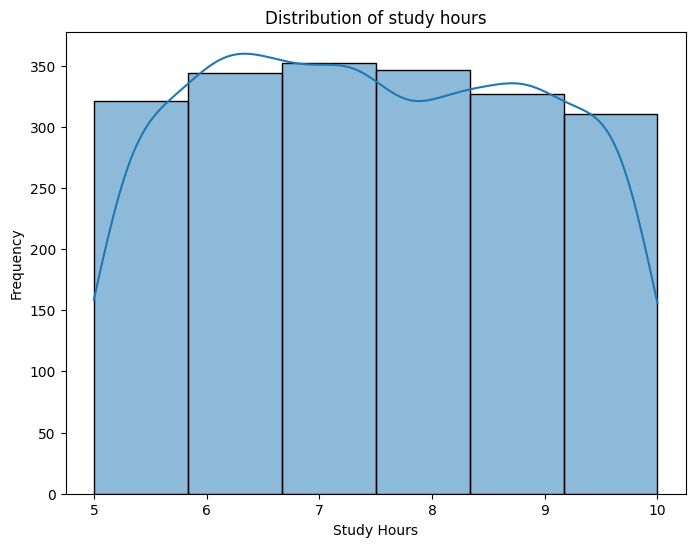

In [24]:
#Understanding the study time of students
plt.figure(figsize=(8,6))
sns.histplot(data['Study_Hours_Per_Day'],bins=6,kde=True)
plt.title("Distribution of study hours")
plt.xlabel("Study Hours")
plt.ylabel("Frequency");


The distribution appears to be approximately uniform, with a slight peak around 6-7 hours, meaning that study hours are fairly evenly spread across the range, but slightly more individuals are studying around the 6-7 hour mark

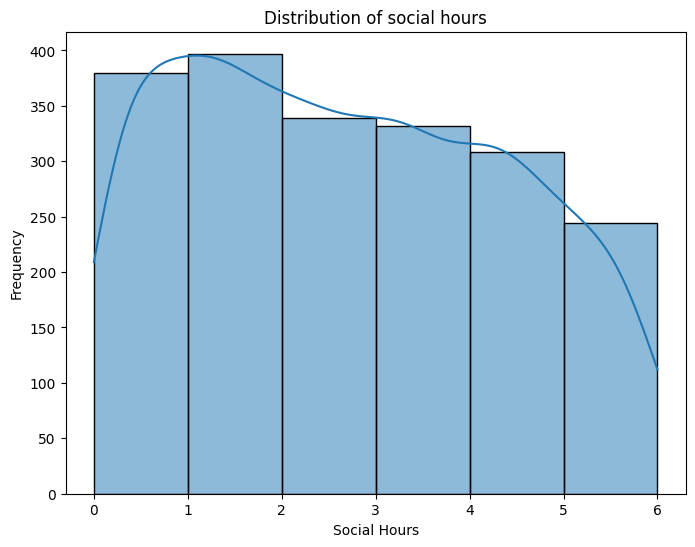

In [41]:
#Understanding the distribution of Social Hours
plt.figure(figsize=(8,6))
sns.histplot(data['Social_Hours_Per_Day'],bins=6,kde=True)
plt.title("Distribution of social hours")
plt.xlabel("Social Hours")
plt.ylabel("Frequency");


In [46]:
#Understanding the distribution of Social Hours
social_time_array=np.array(data['Social_Hours_Per_Day'])
social_less_than_two=np.sum(social_time_array<2)
social_more_than_two=np.sum(social_time_array>2)
print("Students spenting less than two hours socialising:",(social_less_than_two/2000)*100,"%")
print("Students spenting more than two hours socialising:",(social_more_than_two/2000)*100,"%")

Students spenting less than two hours socialising: 38.85 %
Students spenting more than two hours socialising: 59.5 %


More students tend to spent less time socialising.(less than 2 hours)

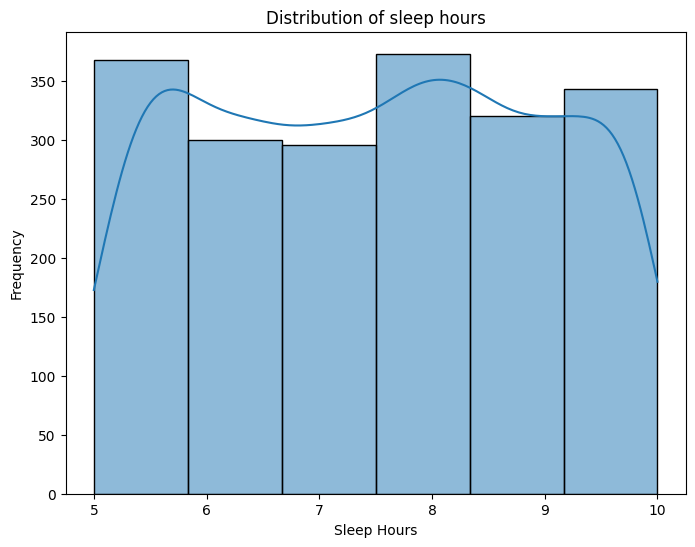

In [52]:
#Understanding the Distribution of sleep hours
plt.figure(figsize=(8,6))
sns.histplot(data['Sleep_Hours_Per_Day'],bins=6,kde=True)
plt.title("Distribution of sleep hours")
plt.xlabel("Sleep Hours")
plt.ylabel("Frequency");


Most people sleep between 6-8 hours.

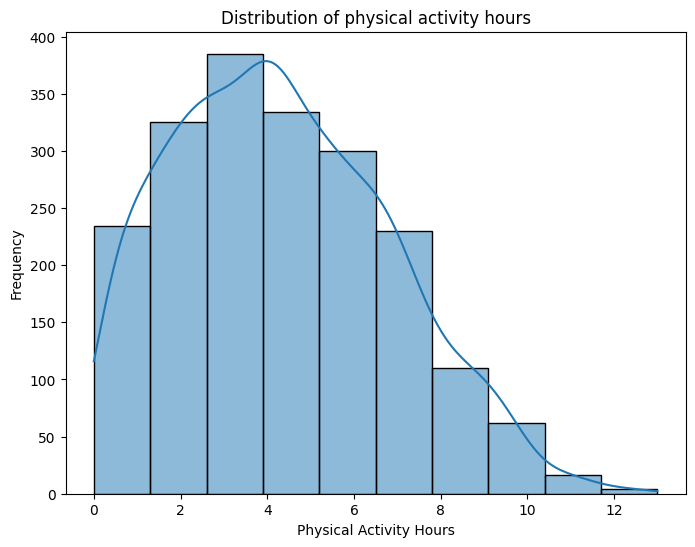

In [55]:
#Understanding the Distribution of Physical Activity Hours
plt.figure(figsize=(8,6))
sns.histplot(data['Physical_Activity_Hours_Per_Day'],bins=10,kde=True)
plt.title("Distribution of physical activity hours")
plt.xlabel("Physical Activity Hours")
plt.ylabel("Frequency");


The graph is skewed right.Most people spent leass than 4 hours on Physical activity

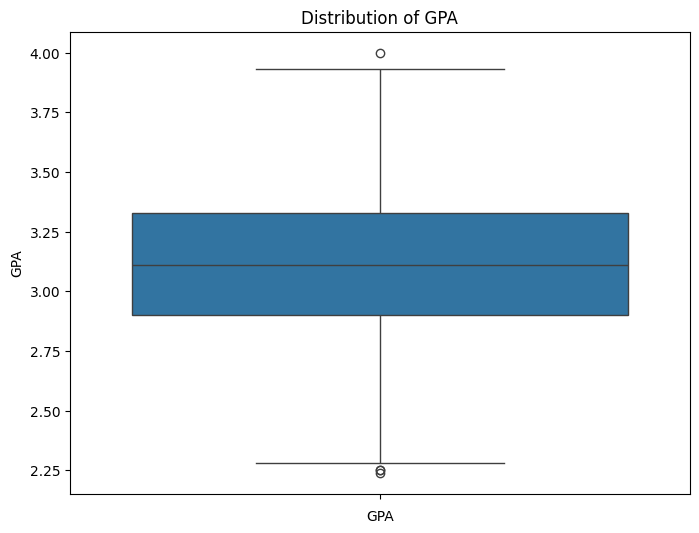

In [38]:
#Understanding the distribution of GPA
plt.figure(figsize=(8,6))
sns.boxplot(data['GPA'])
plt.title("Distribution of GPA")
plt.xlabel('GPA');

GPAs are fairly centralized around 3.0-3.3, with a small number of lower and higher outliers.

**1.How do specific combinations of study time, sleep, and physical activity impact GPA, compared to each factor individually?**




In [60]:
#Creating categories for studytime,sleep,physical activity hours
study_time_threshold=6
sleep_threshold=7
physical_activity_threshold=2
data['study_time_category']=np.where(data['Study_Hours_Per_Day']>study_time_threshold,'high','low')
data['sleep_category']=np.where(data['Sleep_Hours_Per_Day']>sleep_threshold,'high','low')
data['physical_category']=np.where(data['Physical_Activity_Hours_Per_Day']>physical_activity_threshold,'high','low')


In [103]:
data.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level,study_time_category,sleep_category,physical_category,Extracurricular_Category,Social_Category
0,1,6.9,3.8,8.7,2.8,1.8,2.99,moderate,high,high,low,high,high
1,2,5.3,3.5,8.0,4.2,3.0,2.75,low,low,high,high,high,high
2,3,5.1,3.9,9.2,1.2,4.6,2.67,low,low,high,high,high,low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,moderate,high,high,high,high,low
4,5,8.1,0.6,6.5,2.2,6.6,3.51,high,high,low,high,low,high


In [64]:
#creating a combination of the three with average cgpa
gpa_by_lifestyle=data.groupby(['study_time_category','sleep_category','physical_category'])['GPA'].mean().reset_index()
print(gpa_by_lifestyle)

  study_time_category sleep_category physical_category       GPA
0                high           high              high  3.158652
1                high           high               low  3.271837
2                high            low              high  3.165756
3                high            low               low  3.316522
4                 low           high              high  2.814719
5                 low           high               low  2.889091
6                 low            low              high  2.821090


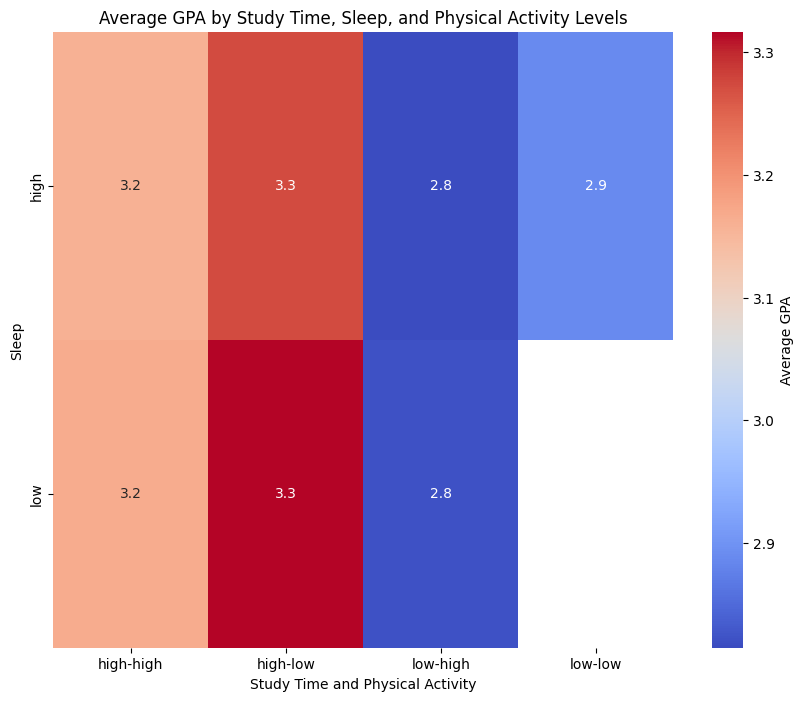

In [71]:

#Create a pivot table to plot a heatmap
pivot_table = gpa_by_lifestyle.pivot_table(values='GPA', index='sleep_category', columns=['study_time_category', 'physical_category'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", cbar_kws={'label': 'Average GPA'})
plt.title("Average GPA by Study Time, Sleep, and Physical Activity Levels")
plt.xlabel("Study Time and Physical Activity")
plt.ylabel("Sleep")
plt.show()


High Study Time + Low Physical Activity + Low Sleep (3.3 GPA):
Students who study a lot, are less physically active, and sleep less tend to have the highest average GPA (3.3).

High Study Time + Low Physical Activity + High Sleep (3.3 GPA):
Similarly, students who study a lot, are less physically active, and sleep adequately also have a high average GPA (3.3).

High Study Time + High Physical Activity + Both Sleep Levels (3.2 GPA):
Students who study a lot, are highly active, and get either high or low sleep have an average GPA of around 3.2.

Low Study Time + High Physical Activity + Both Sleep Levels (2.8 GPA):
Students who study less, are highly active, and get either high or low sleep have the lowest average GPA (2.8).

Low Study Time + Low Physical Activity + High Sleep (2.9 GPA):
Students with low study time, low activity, and adequate sleep have a slightly higher average GPA (2.9) than those with high activity.

From this heatmap, it seems that high study time is generally associated with higher GPAs regardless of physical activity and sleep levels, though low physical activity combined with high or low sleep seems to lead to the highest GPAs. Conversely, low study time tends to correlate with lower GPAs, even when physical activity is high.

**2.Is there an optimal "balance" between extracurricular activities and socializing that correlates with the highest GPA?**

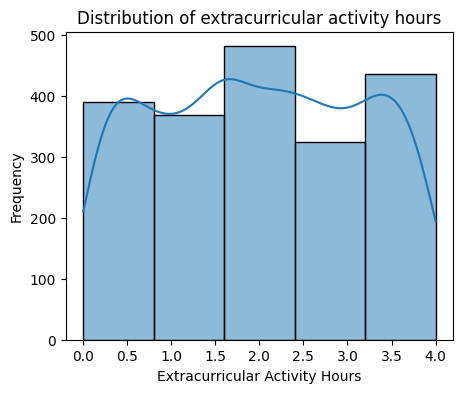

In [84]:
#Understanding the distribution of extracurricular activites hour
plt.figure(figsize=(5,4))
sns.histplot(data['Extracurricular_Hours_Per_Day'],bins=5,kde=True)
plt.title("Distribution of extracurricular activity hours")
plt.xlabel("Extracurricular Activity Hours")
plt.ylabel("Frequency");


The graph is non-uniform and it could be said that most people spent less than 2 hours in extracurricular activities.

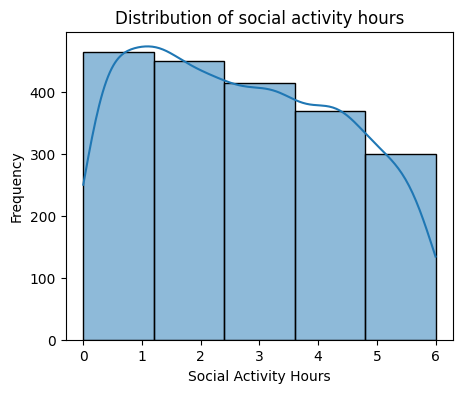

In [85]:
#Understanding the distribution of Socail Activity Hour
plt.figure(figsize=(5,4))
sns.histplot(data['Social_Hours_Per_Day'],bins=5,kde=True)
plt.title("Distribution of social activity hours")
plt.xlabel("Social Activity Hours")
plt.ylabel("Frequency");


The graph is skewed right and most people spent less than 2 hours on social activities

In [86]:
#Creating categories
extracurricular_threshold=2
social_threshold=2
data["Extracurricular_Category"]=np.where(data['Extracurricular_Hours_Per_Day']>2,'high','low')
data["Social_Category"]=np.where(data['Social_Hours_Per_Day']>2,'high','low')
data.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level,study_time_category,sleep_category,physical-category,physical_category,Extracurricular_Category,Social_Category
0,1,6.9,3.8,8.7,2.8,1.8,2.99,moderate,high,high,low,low,high,high
1,2,5.3,3.5,8.0,4.2,3.0,2.75,low,low,high,high,high,high,high
2,3,5.1,3.9,9.2,1.2,4.6,2.67,low,low,high,high,high,high,low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,moderate,high,high,high,high,high,low
4,5,8.1,0.6,6.5,2.2,6.6,3.51,high,high,low,high,high,low,high


In [89]:
gpa_by_activity=data.groupby(['Extracurricular_Category','Social_Category'])['GPA'].mean().reset_index()
print(gpa_by_activity)

  Extracurricular_Category Social_Category       GPA
0                     high            high  3.067763
1                     high             low  3.157279
2                      low            high  3.128216
3                      low             low  3.112737


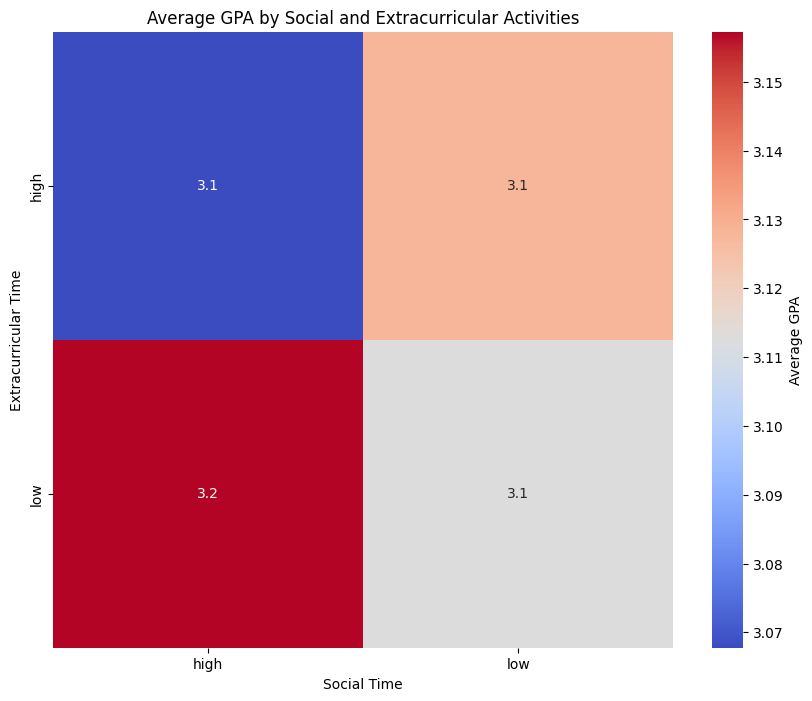

In [92]:
#Create a pivot table to plot a heatmap
pivot_table = gpa_by_activity.pivot_table(values='GPA', index='Social_Category', columns=['Extracurricular_Category'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", cbar_kws={'label': 'Average GPA'})
plt.title("Average GPA by Social and Extracurricular Activities")
plt.xlabel("Social Time")
plt.ylabel("Extracurricular Time")
plt.show()


Students with high social time but low extracurricular time tend to have the highest average GPA (3.2).
Other combinations of social and extracurricular time result in a similar average GPA of 3.1, suggesting that neither high social time nor high extracurricular time alone strongly correlates with a higher GPA.We can conclude that there is not much effect on the time spent in these activities on GPA.

**3.Do students who show high physical activity and socializing tend to have lower stress levels and higher GPAs, indicating better time management?**

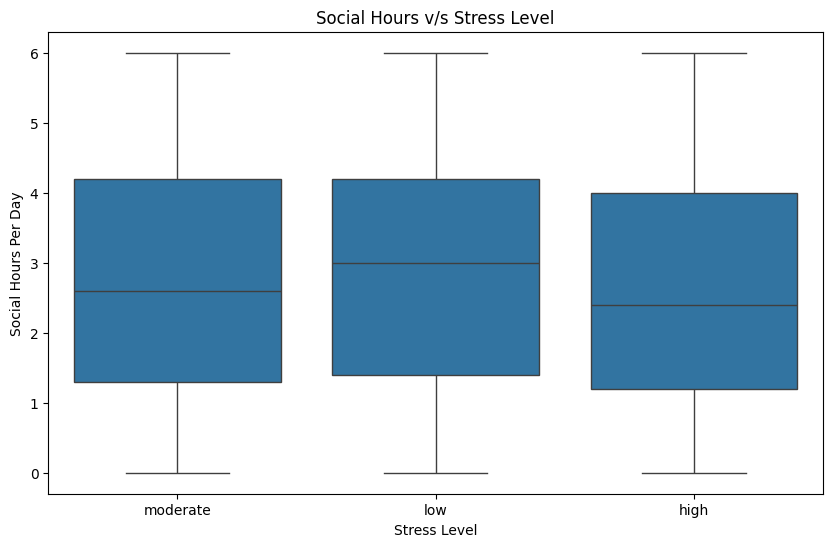

In [120]:
#Plotting the relation between stress level and social activity hours
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stress_Level', y='Social_Hours_Per_Day', data=data)
plt.title("Social Hours v/s Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Social Hours Per Day");



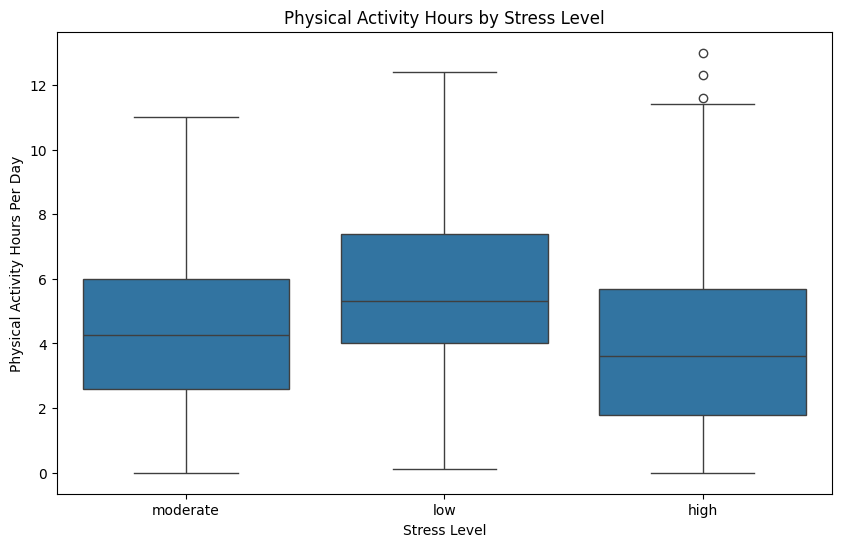

In [119]:
#Plotting the relation between stress level and physical activity hours
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stress_Level',y='Physical_Activity_Hours_Per_Day', data=data)
plt.title("Physical Activity Hours by Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Physical Activity Hours Per Day");

Social Hours:
The median social hours are relatively similar across all stress levels (moderate, low, high).
There are outliers in all stress levels, suggesting some individuals engage in significantly more social hours regardless of their stress level.
While there might be a slight trend of higher social hours in the moderate and high stress groups, it's not very pronounced.

Physical Activity Hours:
The median physical activity hours are also similar across all stress levels.
There are outliers in the moderate and high stress groups, indicating some individuals engage in significantly more physical activity under higher stress.
The box plots suggest a slightly wider range of physical activity hours in the high stress group compared to the low stress group.

Overall, the graphs don't provide strong evidence to conclude that engaging in these activities definitively reduces stress. While there might be a correlation between higher stress levels and increased social or physical activity hours for some individuals, it's difficult to determine causation.

Other factors like individual differences, coping mechanisms, and lifestyle habits might also play a significant role in influencing both stress levels and engagement in these activities.

Therefore, while these activities might have a positive impact on stress management for some people, it's not a universal solution. A comprehensive approach involving various stress management techniques, including social interaction, physical activity, and mindfulness practices, is likely to be more effective.

# CONCLUSION

Academic Performance (GPA): Study time emerged as key factors positively associated with higher GPAs, while physical activity may have a slight positive influence. Socializing and sleep had minimal direct impact on GPA, suggesting that academic performance is influenced more by individual study and rest patterns than by social engagement alone.

Stress Levels: There was no conclusive evidence that socializing or physical activity directly reduces stress. Students with varying stress levels participated in similar amounts of social and physical activity. This implies that factors other than these activities, such as individual coping mechanisms and external support systems, may play a more significant role in stress management.